**Task 3.1 Problem 1 - Data Read, Write and Inspect:**
Complete all following Task:
• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [15]:
import pandas as pd

#loading csv file from dataset
file_path = '/content/drive/MyDrive/Data Set/Copy of bank .csv'
df = pd.read_csv(file_path)

object_columns = df.select_dtypes(include='object').columns.tolist()
unique_values = {col: df[col].unique() for col in object_columns}

null_values = df.isnull().sum()

#dropping  object columns and save numeric DataFrame
numeric_df = df.select_dtypes(exclude='object')
numeric_file_path = 'banknumericdata.csv'
numeric_df.to_csv(numeric_file_path, index=False)

#loading and summarize numeric DataFrame
numeric_df = pd.read_csv(numeric_file_path)
summary_statistics = numeric_df.describe()

print("Object Columns:", object_columns)
print("Unique Values:", unique_values)
print("Null Values:\n", null_values)
print("Summary Statistics:\n", summary_statistics)


Object Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Unique Values: {'job': array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object), 'marital': array(['married', 'single', 'divorced'], dtype=object), 'education': array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object), 'default': array(['no', 'yes'], dtype=object), 'housing': array(['yes', 'no'], dtype=object), 'loan': array(['no', 'yes'], dtype=object), 'contact': array(['unknown', 'cellular', 'telephone'], dtype=object), 'month': array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object), 'poutcome': array(['unknown', 'failure', 'other', 'success'], dtype=object), 'y': array(['no', 'yes'], dtype=object)}
Null Values:
 age          0
job          0
marital      0
education

**Problem 2 - Data Imputations:**
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [16]:
import pandas as pd

#loading csv file from dataset
file_path = '/content/drive/MyDrive/Data Set/Copy of medical_students_dataset.csv'
df = pd.read_csv(file_path)

df_info = df.info()
missing_values = df.isnull().sum()

num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include='object').columns

for col in num_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

for col in cat_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

#checking for duplicates
duplicates_count = df.duplicated().sum()

if duplicates_count > 0:
    df = df.drop_duplicates()

print("Info of Dataset After Handling Missing Values and Duplicates:")
print(df.info())
print(f"Total Duplicates Removed: {duplicates_count}")
print("Final Missing Values Check:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


<ipython-input-16-df501cdac358>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-16-df501cdac358>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Info of Dataset After Handling Missing Values and Duplicates:
<class 'pandas.core.frame.DataFrame'>
Index: 187428 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      187428 non-null  float64
 1   Age             187428 non-null  float64
 2   Gender          187428 non-null  object 
 3   Height          187428 non-null  float64
 4   Weight          187428 non-null  float64
 5   Blood Type      187428 non-null  object 
 6   BMI             187428 non-null  float64
 7   Temperature     187428 non-null  float64
 8   Heart Rate      187428 non-null  float64
 9   Blood Pressure  187428 non-null  float64
 10  Cholesterol     187428 non-null  float64
 11  Diabetes        187428 non-null  object 
 12  Smoking         187428 non-null  object 
dtypes: float64(9), object(4)
memory usage: 20.0+ MB
None
Total Duplicates Removed: 12572
Final Missing Values Check:
 Student ID        0
Age

**Task 3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"
Problem - 1:**
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [47]:
import pandas as pd

#loading csv file from dataset
file_path = '/content/drive/MyDrive/Data Set/Copy of Titanic-Dataset.csv'
df = pd.read_csv(file_path)

columns_to_keep = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
df_subset = df[columns_to_keep]

first_class_passengers = df_subset[df_subset['Pclass'] == 1]

#calculateing statistics for the 'Fare' column
fare_mean = first_class_passengers['Fare'].mean()
fare_median = first_class_passengers['Fare'].median()
fare_max = first_class_passengers['Fare'].max()
fare_min = first_class_passengers['Fare'].min()

print("Mean Fare:", fare_mean)
print("Median Fare:", fare_median)
print("Maximum Fare:", fare_max)
print("Minimum Fare:", fare_min)

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


**Problem - 2:**
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [46]:
import pandas as pd

#loading csv file from dataset
file_path = '/content/drive/MyDrive/Data Set/Copy of Titanic-Dataset.csv'
df = pd.read_csv(file_path)

null_count = df['Age'].isnull().sum()
print(f"Number of null values in the 'Age' column: {null_count}")

df_cleaned = df.dropna(subset=['Age'])

print(f"Shape of the cleaned DataFrame (after dropping null values): {df_cleaned.shape}")
print(df_cleaned.head())


Number of null values in the 'Age' column: 177
Shape of the cleaned DataFrame (after dropping null values): (714, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN  

**Problem - 3:**

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [26]:
import pandas as pd

#loading csv file from dataset
file_path = '/content/drive/MyDrive/Data Set/Copy of Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# One-hot encoding of the 'Embarked' column
df_encoded = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

# Print the modified DataFrame
print(df_encoded.head())  # Display the first few rows to check the changes


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


**Problem - 4:**

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


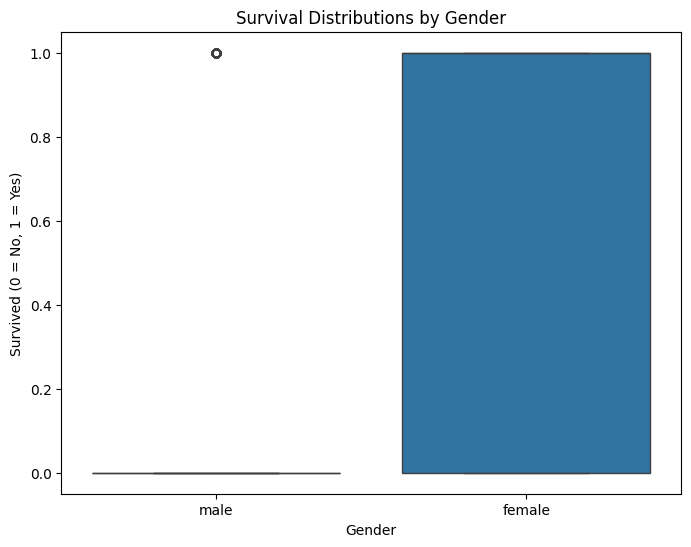

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#loading csv file from dataset
file_path = '/content/drive/MyDrive/Data Set/Copy of Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Calculate the mean survival rate for each gender
mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print(mean_survival_by_gender)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Survived', data=df)
plt.title('Survival Distributions by Gender')
plt.xlabel('Gender')
plt.ylabel('Survived (0 = No, 1 = Yes)')
plt.show()


**Problem - 5:**

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

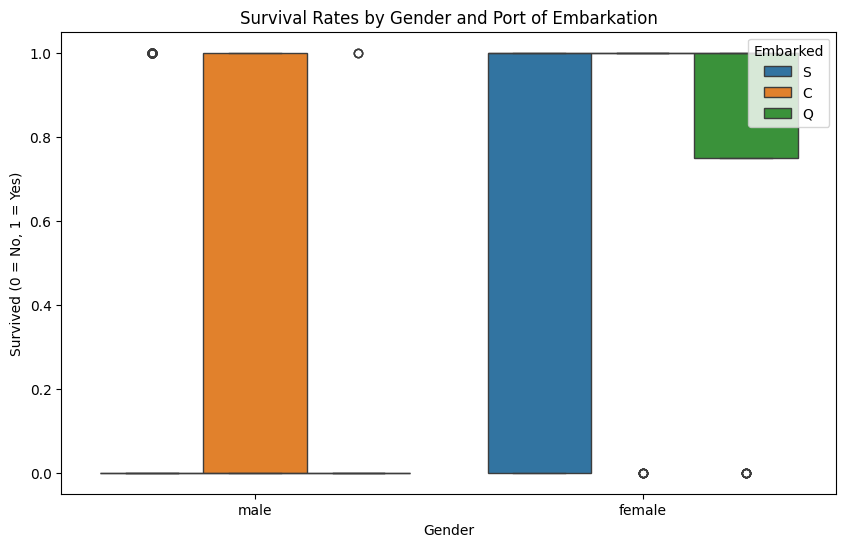

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#loading csv file from dataset
file_path = '/content/drive/MyDrive/Data Set/Copy of Titanic-Dataset.csv'
df = pd.read_csv(file_path)


# Create a visualization that breaks down survival by gender and port of embarkation
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Survived', hue='Embarked', data=df)
plt.title('Survival Rates by Gender and Port of Embarkation')
plt.xlabel('Gender')
plt.ylabel('Survived (0 = No, 1 = Yes)')
plt.legend(title='Embarked', loc='upper right')
plt.show()

**Problem - 6{Optional}:**
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

<ipython-input-42-e0e9600b403c>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_survival_by_class_age = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().reset_index()


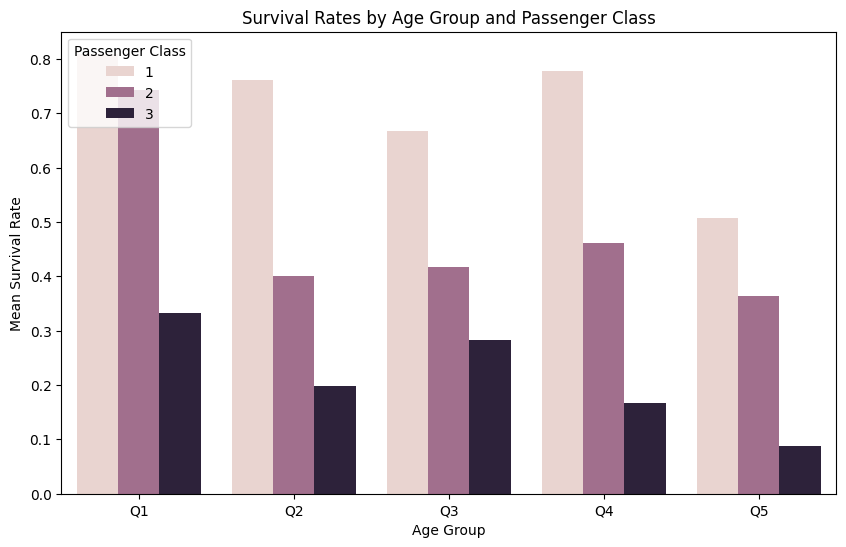

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#loading csv file from dataset
file_path = '/content/drive/MyDrive/Data Set/Copy of Titanic-Dataset.csv'
df = pd.read_csv(file_path)


# Step 1: Create 5 quantiles for the 'Age' column
df['AgeGroup'] = pd.qcut(df['Age'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# Step 2: Calculate the mean survival rate for each combination of 'Pclass' and 'AgeGroup'
mean_survival_by_class_age = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().reset_index()

# Step 3: Create a visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=mean_survival_by_class_age)
plt.title('Survival Rates by Age Group and Passenger Class')
plt.xlabel('Age Group')
plt.ylabel('Mean Survival Rate')
plt.legend(title='Passenger Class', loc='upper left')
plt.show()
